In [1]:
import argparse
import pickle
import os
import numpy as np
import tensorflow as tf
from datetime import datetime, date
from utils.model import create_model
from utils.webservice import getsize_h5model, log_write
from utils.data import create_dataframe, ImageGenerator, get_sample, config_batch
from sklearn.model_selection import train_test_split

from configs.server import MODEL_PATH, LOG_FILE, FLAG, HIST, NEED_CONFIRM
from configs.image import DATA_PATH
# import keras
import matplotlib.pyplot as plt

In [ ]:
# Centralize data


In [2]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [3]:
image_folder = 'new_data'
# centralized_image_folder = 'centralized_data'
learning_rate = 0.001

In [4]:
# get number of classes (= number of subfolder)
training_path = os.path.join(DATA_PATH, image_folder)
classes = [name for name in os.listdir(training_path)
               if os.path.isdir(os.path.join(training_path, name))]
num_classes = len(classes)

In [5]:
classes

['LNG', 'LRNG', 'OK', 'RNG']

In [11]:
image_dataframe = create_dataframe(training_path, classes)
image_dataframe.head(4)

,Filepath,Classes,Label
0,data\new_data\LNG\20191206170048_WEQ6T12060028...,LNG,0
1,data\new_data\LNG\20191206170048_WEQ6T12060028...,LNG,0
2,data\new_data\LNG\20191206170158_WEQ6T12060029...,LNG,0
3,data\new_data\LNG\20191206170158_WEQ6T12060029...,LNG,0


In [7]:
data_split = ['train', 'val']

In [17]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

train_frame, test_frame = train_test_split(image_dataframe, test_size=0.15, random_state=911)
dtframe = {'train': train_frame, 'val': test_frame}

normal_generator = {x: image_generator.flow_from_dataframe(dataframe=dtframe[x], 
                                                           x_col='Filepath',
                                                           y_col='Classes',
                                                           target_size=(224, 224),
                                                           class_model='categorical',
                                                           batch_size=8)
                    for x in data_split}

Found 297 validated image filenames belonging to 4 classes.
Found 53 validated image filenames belonging to 4 classes.


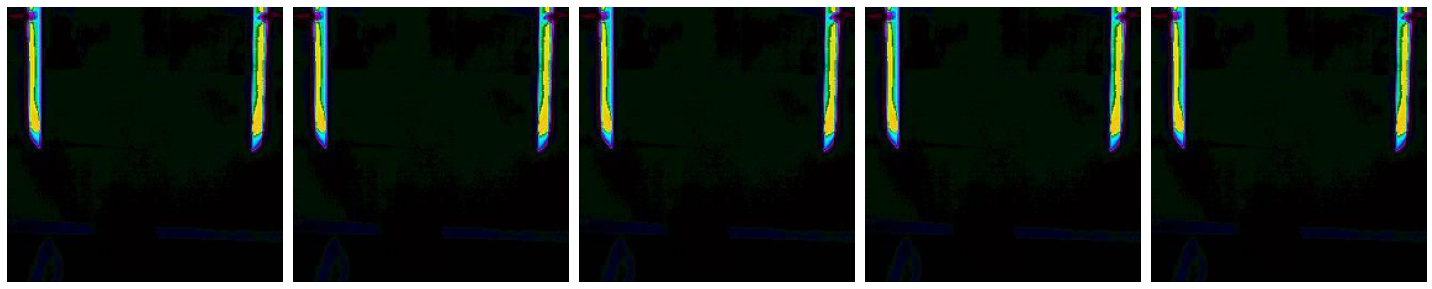

In [18]:
aug_images = [normal_generator['train'][0][0][0] for i in range(5)]
plot_images(aug_images)

In [19]:
def scheduler(epoch):
    if epoch < 7:
        return 0.0001
    else:
        return 0.0001 * tf.math.exp(0.1 * (10 - epoch))

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Try teachable machine

In [47]:
normal_model = create_model('Xception', num_classes)
normal_history = normal_model.fit(x=normal_generator['train'],
                                  validation_data=normal_generator['val'],
                                  validation_freq=1,
                                  epochs=30,
                                  verbose=1, 
                                  callbacks=[callback])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 38 steps, validate for 7 steps
Epoch 1/30
38/38 [==============================] - 77s 2s/step - loss: 0.5587 - accuracy: 0.8384 - val_loss: 0.4931 - val_accuracy: 0.7736
Epoch 2/30
38/38 [==============================] - 71s 2s/step - loss: 0.1652 - accuracy: 0.9461 - val_loss: 0.3327 - val_accuracy: 0.9057
Epoch 3/30
38/38 [==============================] - 71s 2s/step - loss: 0.0468 - accuracy: 0.9933 - val_loss: 0.2974 - val_accuracy: 0.9057
Epoch 4/30
38/38 [==============================] - 71s 2s/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.2656 - val_accuracy: 0.9245
Epoch 5/30
38/38 [==============================] - 72s 2s/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.3046 - val_accuracy: 0.9245
Epoch 6/30
38/38 [==============================] - 72s 2s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.3113 - val_accuracy: 0.9245
Epoch 7/30
38/38 [==============================] - 72s 2s/step - los

In [48]:
centralized_image_folder = 'centralized_data'
training_path = os.path.join(DATA_PATH, centralized_image_folder)
image_dataframe = create_dataframe(training_path, classes)
# image_dataframe.head(4)
image_generator = tf.keras.preprocessing.image.ImageDataGenerator()

train_frame, test_frame = train_test_split(image_dataframe, test_size=0.15, random_state=911)
dtframe = {'train': train_frame, 'val': test_frame}

In [42]:
dtframe['train'].head()

,Filepath,Classes,Label
262,data\centralized_data\OK\20191125161902_WEQ6T1...,OK,2
89,data\centralized_data\OK\20191125102915_WEQ6T1...,OK,2
298,data\centralized_data\OK\20191125170648_WEQ6T1...,OK,2
10,data\centralized_data\LRNG\20191125092256_WEQ6...,LRNG,1
252,data\centralized_data\OK\20191125160545_WEQ6T1...,OK,2


In [49]:
centralized_generator = {x: image_generator.flow_from_dataframe(dataframe=dtframe[x], 
                                                           x_col='Filepath',
                                                           y_col='Classes',
                                                           target_size=(224, 224),
                                                           class_model='categorical',
                                                           batch_size=8)
                    for x in data_split}
# centralized_images = [centralized_generator['train'][0][0][0] for i in range(5)]
# plot_images(centralized_images)

Found 297 validated image filenames belonging to 4 classes.
Found 53 validated image filenames belonging to 4 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


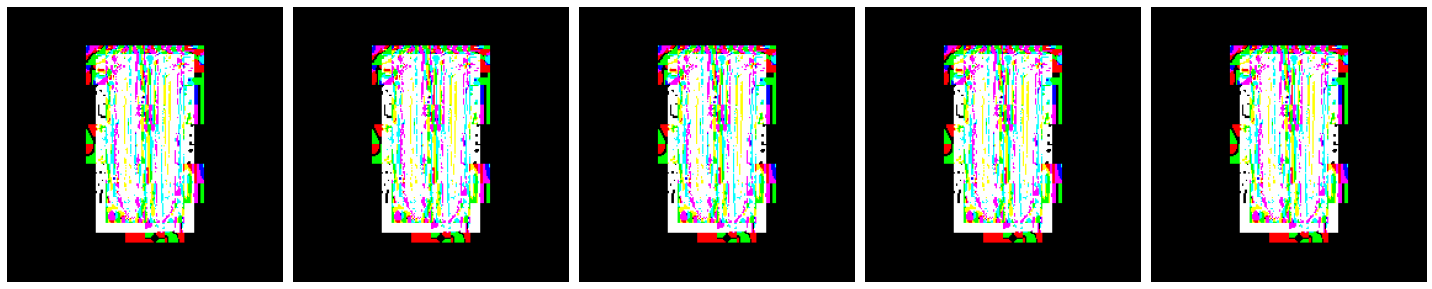

In [54]:
centralized_images = [centralized_generator['train'][0][0][0] for i in range(5)]
plot_images(centralized_images)

In [56]:
centralized_images[0].min()

0.0

In [52]:
centralized_model = create_model('Xception', num_classes)
centralized_history = centralized_model.fit(x=centralized_generator['train'],
                                            validation_data=centralized_generator['val'],
                                            validation_freq=1,
                                            epochs=30,
                                            verbose=1, 
                                            callbacks=[callback])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 38 steps, validate for 7 steps
Epoch 1/30
38/38 [==============================] - 78s 2s/step - loss: 0.6664 - accuracy: 0.8013 - val_loss: 0.7643 - val_accuracy: 0.7736
Epoch 2/30
38/38 [==============================] - 74s 2s/step - loss: 0.2342 - accuracy: 0.9327 - val_loss: 0.5975 - val_accuracy: 0.7736
Epoch 3/30
38/38 [==============================] - 73s 2s/step - loss: 0.1220 - accuracy: 0.9697 - val_loss: 0.5925 - val_accuracy: 0.7736
Epoch 4/30
38/38 [==============================] - 72s 2s/step - loss: 0.0876 - accuracy: 0.9798 - val_loss: 0.2409 - val_accuracy: 0.9245
Epoch 5/30
38/38 [==============================] - 71s 2s/step - loss: 0.0519 - accuracy: 0.9865 - val_loss: 0.1506 - val_accuracy: 0.9623
Epoch 6/30
38/38 [==============================] - 70s 2s/step - loss: 0.0479 - accuracy: 0.9966 - val_loss: 0.1855 - val_accuracy: 0.9245
Epoch 7/30
38/38 [==============================] - 70s 2s/step - los

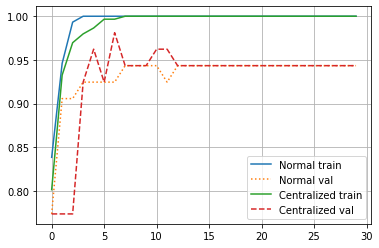

In [53]:
plt.plot(normal_history.history['accuracy'])
plt.plot(normal_history.history['val_accuracy'], linestyle=':')
plt.plot(centralized_history.history['accuracy'])
plt.plot(centralized_history.history['val_accuracy'], linestyle='--')
plt.legend(['Normal train', 'Normal val',
            'Centralized train', 'Centralized val'])
plt.grid()
plt.show()

In [46]:
257 / 350

0.7342857142857143